In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [86]:
def sobelx(img):
    blur_img = cv2.GaussianBlur(img, (3, 3), 0) # apply gaussian blur
    filter = cv2.filter2D(blur_img, cv2.CV_32F, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])) # apply sobel filter for x
    sobel_img = cv2.convertScaleAbs(filter) # convert every value to absolute value of itself

    plt.imshow(img, 'gray')
    return sobel_img


def sobely(img):
    blur_img = cv2.GaussianBlur(img, (3, 3), 0) # apply gaussian blur
    filter = cv2.filter2D(blur_img, cv2.CV_32F, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])) # apply sobel filter for x
    sobel_img = cv2.convertScaleAbs(filter) # convert every value to absolute value of itself

    plt.imshow(img, 'gray')
    return sobel_img


def canny_edge(img):
    filtered_img = cv2.Canny(img, 0, 100)

    plt.imshow(img, 'gray')
    return filtered_img

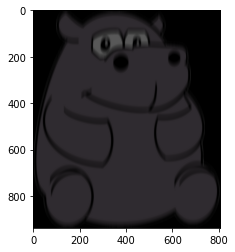

In [102]:
def gaussian(sigma, x):
    fract_part = (1/math.sqrt(2*math.pi*sigma**2))
    exp_part = math.e**(-(x**2)/(2*sigma**2))
    combined = fract_part * exp_part

    return  combined 


def gaussian_blur(img, sigma, x):
    kernel = np.array(gaussian(sigma, 0))
    for i in range(1, x):
        kernel = np.vstack((kernel, gaussian(sigma, i)))

    filter = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

    plt.imshow(filter)
    return filter

img = cv2.imread('Bozu.png')
x = gaussian_blur(img, 30,30)
